In [1]:
!pip install wget wfdb neurokit2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=1ec8e87f063a394f4b6c2077edc11942471c67b6a82322529c5f5ec39f0db286
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: SoundFile
    Found existing installation: soundfile 0.12.1
    Uninstalling soundfile-0.12.1:
      Successfully uninstalled soundfile-0.12.1


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json'

kaggle.json
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [4]:
!kaggle datasets download -d bjoernjostein/george-moody-2023-complete-dataset

100% 17.4G/17.4G [02:14<00:00, 139MB/s]
100% 17.4G/17.4G [02:14<00:00, 139MB/s]


In [57]:
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dir_name = "./"
extension = ".zip"
 
os.chdir(dir_name) # change directory from working dir to dir with files

for item in os.listdir(dir_name): # loop through items in dir
    if item.endswith(extension): # check for ".zip" extension
        file_name = os.path.abspath(item) # get full path of files
        zip_ref = zipfile.ZipFile(file_name) # create zipfile object
        zip_ref.extractall(dir_name) # extract file to dir
        zip_ref.close() # close file
        os.remove(file_name) # delete zipped file

In [9]:
os.rename("./i-care-international-cardiac-arrest-research-consortium-database-1.0/", "./data/")

In [14]:
print("Total number of patients in training set: ", len(os.listdir("./data/training/")))

Total number of patients in training set:  607


In [18]:
cnt = 0
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".mat"):
        cnt +=1
print("Total number of recordings: ", cnt)

Total number of recordings:  23528


In [54]:
num_rec = []
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".mat"):
        num_rec.append(os.path.join(root, name).split("/")[-2])
num_rec = np.asarray(num_rec)
_, num_rec_pr_pat = np.unique(num_rec, return_counts=True)

In [55]:
num_rec.shape

(23528,)

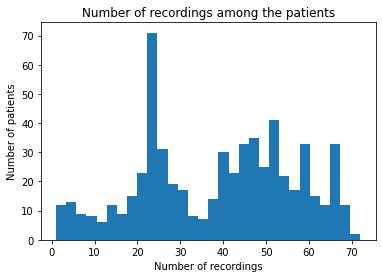

In [56]:
plt.hist(num_rec_pr_pat, bins=30)
plt.xlabel("Number of recordings")
plt.ylabel("Number of patients")
plt.title("Number of recordings among the patients")
plt.show()

In [50]:
df = 0
cnt = 0
for root, dirs, files in os.walk("./data/training/"):
   for name in files:
      if os.path.join(root, name).endswith(".tsv"):
        df_temp = pd.read_csv(os.path.join(root, name), sep="\t").dropna()
        if cnt == 0:
          df = df_temp
        else:
          df = pd.concat([df,df_temp])
        cnt+=1

In [61]:
df.head()

,Hour,Time,Quality,Record
34,35,34:55,1.0,ICARE_0829_35
35,36,35:55,1.0,ICARE_0829_36
36,37,36:55,1.0,ICARE_0829_37
37,38,37:35,1.0,ICARE_0829_38
38,39,38:55,1.0,ICARE_0829_39


In [62]:
df["Quality"]

34    1.000
35    1.000
36    1.000
37    1.000
38    1.000
      ...  
57    1.000
58    1.000
59    1.000
60    1.000
61    0.983
Name: Quality, Length: 23528, dtype: float64

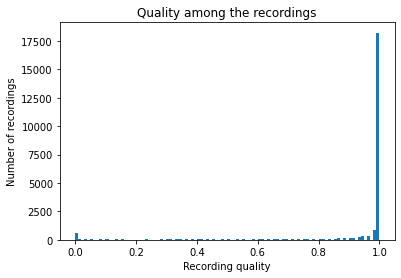

In [64]:
plt.hist(df["Quality"], bins=100)
plt.xlabel("Recording quality")
plt.ylabel("Number of recordings")
plt.title("Quality among the recordings")
plt.show()

In [80]:
print("Number of signals with quality equal to 1.0 = ", np.where(df["Quality"] == 1.0)[0].shape[0])
print("Percent of total signal with quality equal to 1.0 = ", round((np.where(df["Quality"] == 1.0)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality equal to 1.0 =  18235
Percent of total signal with quality equal to 1.0 =  77.5


In [81]:
print("Number of signals with quality less than 1.0 = ", np.where(df["Quality"] != 1.0)[0].shape[0])
print("Percent of total signal with quality less than 1.0 = ", round((np.where(df["Quality"] != 1.0)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 1.0 =  5293
Percent of total signal with quality less than 1.0 =  22.5


In [84]:
print("Number of signals with quality less than 0.75 = ", np.where(df["Quality"] < 0.75)[0].shape[0])
print("Percent of total signal with quality less than 0.75 = ", round((np.where(df["Quality"] < 0.75)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.75 =  2338
Percent of total signal with quality less than 0.75 =  9.94


In [85]:
print("Number of signals with quality less than 0.5 = ", np.where(df["Quality"] < 0.5)[0].shape[0])
print("Percent of total signal with quality less than 0.5 = ", round((np.where(df["Quality"] < 0.5)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.5 =  1756
Percent of total signal with quality less than 0.5 =  7.46


In [86]:
print("Number of signals with quality less than 0.25 = ", np.where(df["Quality"] < 0.25)[0].shape[0])
print("Percent of total signal with quality less than 0.25 = ", round((np.where(df["Quality"] < 0.25)[0].shape[0]/df.shape[0])*100,2))

Number of signals with quality less than 0.25 =  1069
Percent of total signal with quality less than 0.25 =  4.54


In [ ]:
df["Record"]

In [96]:
df["Patient"]

,Hour,Time,Quality,Record
34,35,34:55,1.000,ICARE_0829_35
35,36,35:55,1.000,ICARE_0829_36
36,37,36:55,1.000,ICARE_0829_37
37,38,37:35,1.000,ICARE_0829_38
38,39,38:55,1.000,ICARE_0829_39
...,...,...,...,...
57,58,57:55,1.000,ICARE_0874_58
58,59,58:15,1.000,ICARE_0874_59
59,60,59:35,1.000,ICARE_0874_60
60,61,60:20,1.000,ICARE_0874_61


<AxesSubplot:ylabel='Frequency'>

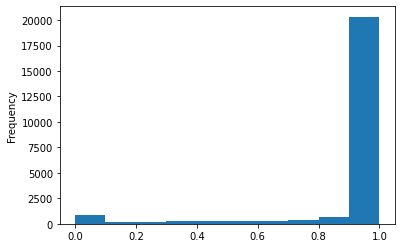

In [93]:
df.groupby("Record")["Quality"].mean().plot.hist()

In [95]:
df.groupby("Record")["Quality"].mean()

Record
ICARE_0284_05    1.000
ICARE_0284_06    1.000
ICARE_0284_07    1.000
ICARE_0284_08    1.000
ICARE_0284_09    0.983
                 ...  
ICARE_1020_68    1.000
ICARE_1020_69    1.000
ICARE_1020_70    1.000
ICARE_1020_71    1.000
ICARE_1020_72    1.000
Name: Quality, Length: 23528, dtype: float64

In [11]:
for i in os.listdir("./data/training/"):
  print(i)

ICARE_0829
ICARE_0319
ICARE_0773
ICARE_0707
ICARE_0916
ICARE_0882
ICARE_0879
ICARE_0413
ICARE_0545
ICARE_0690
ICARE_0610
ICARE_0532
ICARE_1017
ICARE_0781
ICARE_0890
ICARE_0561
ICARE_0299
ICARE_0635
ICARE_0980
ICARE_0685
ICARE_0601
ICARE_0679
ICARE_0904
ICARE_0772
ICARE_0502
ICARE_0648
ICARE_0340
ICARE_0977
ICARE_0477
ICARE_0702
ICARE_0967
ICARE_0774
ICARE_0741
ICARE_0570
ICARE_0501
ICARE_0752
ICARE_0941
ICARE_1005
ICARE_0432
ICARE_0313
ICARE_0370
ICARE_0447
ICARE_0632
ICARE_0341
ICARE_0937
ICARE_0592
ICARE_0637
ICARE_0756
ICARE_0872
ICARE_0764
ICARE_0525
ICARE_1002
ICARE_0604
ICARE_0789
ICARE_0368
ICARE_0884
ICARE_0656
ICARE_0692
ICARE_0785
ICARE_0830
ICARE_0363
ICARE_0442
ICARE_0713
ICARE_0470
ICARE_0334
ICARE_0630
ICARE_0423
ICARE_1013
ICARE_0398
ICARE_0721
ICARE_0779
ICARE_0624
ICARE_0745
ICARE_0708
ICARE_0649
ICARE_0953
ICARE_0658
ICARE_0500
ICARE_0833
ICARE_0593
ICARE_0354
ICARE_0347
ICARE_0437
ICARE_0378
ICARE_0474
ICARE_0543
ICARE_0472
ICARE_0974
ICARE_0730
ICARE_0711
ICARE_0414